#Final Project
Project Requirements
May 2023


Cement Mill Process
This is a mimic of the Cement Mill in PECEM Plant in Brazil. This gives an overview of the process
of the mill.

You can find a more detailed mimic in a separate file accompanied with an excel file which maps
the numbers in the mimic with the tag names of the sensor variables.


Block 1: Separator Motor Block
For analysis purposes the production process can be broken down to several blocks. Each block
describes a specific part of the process. For example, the Separator Motor Block gives us the
dependence of the energy expenditure of the separator from the input variables. These
dependencies have been determined by business knowledge, which means that there might be
other dependencies that can be identified by extra analysis.

Block 2: Mill Differential Pressure Block


Tasks
You are given a dataset that contains measurements for a 4-month period from a cement mill
plant. There are 2 separate problems that need to be addressed, i.e. the Blocks above. Each of
these has a series of inputs (which are the independent variables that should be used) and one
output (that will serve as the target variable). These are described in the Figures above.
For each of the two blocks:
1. Check the dataset for irregularities (e.g. missing or extreme values, values in bad format)
and make the appropriate actions if needed.
v
3. Quantify the delay time (if any) between a variation in the input variables and the
outcome effect in the output variable.
4. Explore the correlation of the output variable with the input variables using visual and
statistical methods and describe the influence on the output variable that a variation of
the input values causes.
Main Task
5. Using the proposed input variables (and any other variable from the received dataset
that you think is relevant) create a model that, given the operating conditions of the
mill, can predict the output variable for the next 5 minutes, in 30 second intervals.
Bonus Tasks
6. Investigate if the use of any other variables, not present in the block’s “input variables”,
can help.

##How Panagiotis this dumb fuck thinks of the task with google , stackoverflow and chatgpt maybe some other AIs
    Data Cleaning:
        Check the dataset for irregularities such as missing or extreme values and values in bad format.
        Take appropriate actions to handle these irregularities, such as removing or imputing missing values and addressing extreme values.

    Statistical Analysis:
        Understand the main statistical characteristics of the important input and output variables in the dataset.
        Use visual and statistical methods to analyze the variables and gain insights into their distributions, central tendencies, and variations.

    Delay Time Analysis:
        Quantify the delay time, if any, between a variation in the input variables and its effect on the output variable.
        Explore how changes in the input variables relate to changes in the output variable over time.

    Correlation Analysis:
        Explore the correlation between the output variable and the input variables using visual and statistical methods.
        Describe the influence of input variable variations on the output variable.



# A slider cause i like it this way. Imports!!!!!

In [ ]:
#Take what you need add what ever you want box
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.signal import correlate
from sklearn.preprocessing import MinMaxScaler
import chardet
import warnings
warnings.filterwarnings("ignore")

# Now L and J we import , now you make the chooice you want it dirty or clean ?

1. Local
2. funcy cloud bitches

#localo

In [ ]:
#Clena

df_May = pd.read_csv('May_cleaned.csv', encoding='latin-1')
df_June = pd.read_csv("June_cleaned.csv",  encoding='latin-1')
df_July = pd.read_csv("July_cleaned.csv",  encoding='latin-1')
df_August = pd.read_csv("August_cleaned.csv", encoding='latin-1')
df_September = pd.read_csv("September_cleaned.csv", encoding='latin-1')
df_October = pd.read_csv("October_cleaned.csv", encoding='latin-1')
df_Semester = pd.read_csv("Semester_cleaned.csv", encoding='latin-1')

In [ ]:
#filthy

df_May = pd.read_csv('May.csv', sep=';', encoding='latin-1')
df_June = pd.read_csv("June.csv", sep=';', encoding='latin-1')
df_July = pd.read_csv("July.csv", sep=';', encoding='latin-1')
df_August = pd.read_csv("August.csv", sep=';', encoding='latin-1')
df_September = pd.read_csv("September.csv", sep=';', encoding='latin-1')
df_October = pd.read_csv("October.csv", sep=';', encoding='latin-1')

# cloudo

In [ ]:
# 2. Mount your drive to upload files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#clean

df_May = pd.read_csv('/content/drive/MyDrive/May_cleaned.csv', encoding='latin-1')
df_June = pd.read_csv("/content/drive/MyDrive/June_cleaned.csv", encoding='latin-1')
df_July = pd.read_csv("/content/drive/MyDrive/July_cleaned.csv", encoding='latin-1')
df_August = pd.read_csv("/content/drive/MyDrive/August_cleaned.csv", encoding='latin-1')
df_September = pd.read_csv("/content/drive/MyDrive/September_cleaned.csv", encoding='latin-1')
df_October = pd.read_csv("/content/drive/MyDrive/October_cleaned.csv", encoding='latin-1')
df_Semester_noJulySeptember = pd.read_csv("/content/drive/MyDrive/Semester_cleaned_noJulySeptember.csv", encoding='latin-1')

In [ ]:
#filty ass

df_May = pd.read_csv('/content/drive/MyDrive/May.csv', sep=';', encoding='latin-1')
df_June = pd.read_csv("/content/drive/MyDrive/June.csv", sep=';', encoding='latin-1')
df_July = pd.read_csv("/content/drive/MyDrive/July.csv", sep=';', encoding='latin-1')
df_August = pd.read_csv("/content/drive/MyDrive/August.csv", sep=',', encoding='latin-1') # check the separator
df_September = pd.read_csv("/content/drive/MyDrive/September.csv", sep=';', encoding='latin-1')
df_October = pd.read_csv("/content/drive/MyDrive/October.csv", sep=',', encoding='latin-1') # check the separator

In [ ]:
#df_May['total_feed_ton/h_pv']
#df_June['total_feed_ton/h_pv']
df_Semester_noJulySeptember['total_feed_ton/h_pv']
#df_August['total_feed_ton/h_pv']

#df_October['total_feed_ton/h_pv']

# Functions

In [ ]:
def find_name(df, name:str):

  matching_columns = [col for col in df if name in col]

  return matching_columns

In [ ]:
def normal_op(df, column: str, threshold: int):
    """
    Filters the dataframe to keep measurements only during normal machine operation.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing machine operation data.
    - column: The feature you want to filter
    - threshold: Value of the filter you want to apply

    Returns:
    - pandas.DataFrame: The filtered dataframe with measurements during normal operation.
    """

    # Filter the dataframe based on normal operation
    filtered_df = df[df[column] > threshold]

    return filtered_df

In [ ]:
def visual_delay(df, input:str, output:str, start_time:str, end_time:str, max_delay=20):
    """
    Creates a Delay-Correlation graph.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing machine operation data.
    - input: The feature you want to use as an input
    - output: The feature you want to use as an output
    - start_time
    - end_time
    """

    delays = np.arange(0, max_delay + 1)
    correlations = []

    for delay in delays:
        delayed_data_shifted = np.roll(df[output].values, delay)
        correlation = np.corrcoef(df[input].values, delayed_data_shifted)[0, 1]
        correlations.append(correlation)

    plt.plot(delays, correlations, marker='o')
    plt.xlabel('Delay')
    plt.ylabel('Correlation')
    plt.title('Delay Analysis')
    plt.grid(True)
    plt.xticks(delays)
    plt.show()

In [ ]:
def calc_delay(df, input:str, output:str, start_time:str, end_time:str, max_delay=20, time_resolution=0.5):
    """
    Returns the time delay with the highest correlation.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing machine operation data.
    - input: The feature you want to use as an input
    - output: The feature you want to use as an output
    - start_time
    - end_time
    - time_resolution: The interval of time (0.5 minutes by default)
    """

    delays = np.arange(0, max_delay + 1)
    correlations = []

    for delay in delays:
        delayed_data_shifted = np.roll(df[output].values, delay)
        correlation = np.corrcoef(df[input].values, delayed_data_shifted)[0, 1]
        correlations.append(correlation)

    max_correlation = max(correlations)
    max_delay = delays[correlations.index(max_correlation)]

    max_delay_seconds = max_delay * time_resolution

    return max_delay_seconds

In [ ]:
def plot_correlation(y_test, y_pred):
    # Calculate correlation coefficient
    correlation_coefficient = np.corrcoef(y_test, y_pred)[0, 1]

    # Create a dataframe with y_test and y_pred values
    data = {'Actual': y_test, 'Predicted': y_pred}
    df = pd.DataFrame(data)

    # Calculate correlation matrix
    corr_matrix = df.corr()

    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()
    print(f"Correlation Coefficient: {correlation_coefficient:.4f}")

# 1. Check the dataset for irregularities (e.g. missing or extreme values, values in bad format) and make the appropriate actions if needed.
The cleaning operation Maria is the MVP!!!!

🧹 Run below cells to clean the data 🧹
 If you imported clean data move to '**Outliers**'

In [ ]:
#I tried to iterate the DataFrames, it won't work leave it as is

df_May = df_May.iloc[1:] # 1st row
df_May = df_May .drop('Unnamed: 0', axis=1) # 1st column

df_June = df_June.iloc[1:] # 1st row
df_June = df_June .drop('Unnamed: 0', axis=1) # 1st column

df_July = df_July.iloc[1:] # 1st row
df_July = df_July.drop('Unnamed: 0', axis=1) # 1st column

df_August = df_August.iloc[1:] # 1st row
df_August = df_August.drop('Unnamed: 0', axis=1) # 1st column

df_September = df_September.iloc[1:] # 1st row
df_September = df_September.drop('Unnamed: 0', axis=1) # 1st column

df_October = df_October.iloc[1:] # 1st row
df_October = df_October.drop('Unnamed: 0', axis=1) # 1st column


Function to handle various date formats and convert them into a standardized format

In [ ]:
def parse_date(date_string):
    try:
        return pd.to_datetime(date_string, format='%d/%m/%Y %H:%M').strftime('%Y-%m-%d %H:%M')
    except ValueError:
        return pd.to_datetime(date_string, format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d %H:%M')

Convert DataFrames to a standardized format

In [ ]:
# List of dataframes
dataframes = [df_May, df_June, df_July, df_August, df_September, df_October]

# Iterate over the list of dataframes
for df in dataframes:
    df['date'] = df['date'].apply(parse_date)

df_May['date']

In ~15% of the May DataFrame the values have "ERROR" values. We dropped them because they are insignificantly low

In [ ]:
dataframes = [df_May, df_June, df_July, df_August, df_September, df_October]

for df in dataframes:
    # Transpose the dataframe
    transposed_df = df.T

    # Count the number of "ERROR" values in each column
    error_counts = transposed_df.eq("ERROR").sum()

    # Get the column names where the count of "ERROR" values is not equal to 93
    columns_to_drop = error_counts[error_counts > 0].index

    # Drop the columns from the dataframe
    transposed_dropped_df = transposed_df.drop(columns_to_drop, axis=1)

    # Get the variable name using globals() or locals()
    df_name = [name for name, obj in globals().items() if obj is df][0]

    # Print the resulting modified dataframe
    print(len(columns_to_drop),' columns from' ,df_name , 'contain "ERROR" values')

Since df_May has 'ERROR' values we are dropping them

In [ ]:
# Transpose the dataframe df_May
transposed_df = df_May.T

# Count the number of "ERROR" values in each column
error_counts = transposed_df.eq("ERROR").sum()

# Get the column names where the count of "ERROR" values is greater than 0
columns_to_drop = error_counts[error_counts > 0].index

# Drop the columns from the transposed dataframe
transposed_dropped_df = transposed_df.drop(columns_to_drop, axis=1)

# Transpose the transposed and dropped dataframe back to its original form
df_May= transposed_dropped_df.T

The DataFrame has objects, convert them in float type

In [ ]:
# Convert selected columns to float
dataframes = [df_May, df_June, df_August, df_September, df_October]

for df in dataframes:
  df[df.columns[2:]] = df[df.columns[2:]].astype(float)

Remove NaN in all dataframes (except July). They are insignificantly low

In [ ]:
dataframes = [df_May, df_June, df_August, df_September, df_October]
for df in dataframes:
  df.dropna(inplace=True)

Check a dataframe for NaN by changing the check_NaN_df variable

In [ ]:
check_NaN_df = df_July  # Put any month you want to check for NaN (na ginoyn oloi oi mines drop ektos apo July)
missing_val_ = check_NaN_df.isna().sum()

print(f"There are {missing_val_[missing_val_ > 0].sum()} missing values in total in the file.\n\
{check_NaN_df.isna().any(axis = 1).sum()} rows are affected.")

Remove **df_July** columns that have more than 25% NaN Values (they're not usable).
**Some of those columns are inpurt variables, this means we might drop the dataframe df_July as not usable**


In [ ]:
# Calculate the mean of missing values per column
missing_mean = df_July.isna().mean()

# Get the column names where the missing mean exceeds 0.25
columns_to_drop = missing_mean[missing_mean > 0.25].index

# Drop the columns with missing mean > 0.3
df_July.drop(columns=columns_to_drop, inplace=True)

df_July

Remove df_July rows that have more than 25% NaN Values (they're not usable)

In [ ]:
# Calculate the mean of missing values per row
missing_mean = df_July.isna().mean(axis=1)

# Get the row indices where the missing mean exceeds 0.25
rows_to_drop = missing_mean[missing_mean > 0.25].index

# Drop the rows with missing mean > 0.3
df_July.drop(rows_to_drop, inplace=True)

df_July

Approximately 11K rows (of +75K) had more than 25% NaN values in their columns. This rows are not usable and were dropped, the rest NaN values are insignificanlty low so they were dropped as well

In [ ]:
df_July.dropna(axis=1,  inplace=True) # Drop rest of NaN values

🧹Run above cell till here to clean the data🧹

Written in full , how did you fuck them like that Maria

## Concat the DataFrames to one
(If you used cleaned cvs there is no need to concat. The Semester_cleaned has the data)

In [ ]:
def merge_common_columns (df1, df2):

    common_columns = list(set(df1.columns) & set(df2.columns))

    merged_df = pd.concat([df1[common_columns], df2[common_columns]], axis = 0 )

    merged_df = merged_df.reset_index(drop = True)

    return merged_df


In [ ]:
may_jun = merge_common_columns(df_May, df_June)
#may_jun_jul = merge_common_columns(may_jun, df_July)
may_jun_jul_aug = merge_common_columns(may_jun, df_August)
#may_jun_jul_aug_sep = merge_common_columns(may_jun_jul_aug, df_September)
df = merge_common_columns(may_jun_jul_aug, df_October)

Download new dataframes as csv

In [ ]:

path = '/content/drive/MyDrive/'
filename = 'Semester_cleaned_noJulySeptember.csv'

# Save the DataFrame as a CSV file
df.to_csv(path + filename, index=False)

'''
df_May.to_csv(path + 'May_cleaned.csv', index=False)
df_June.to_csv(path + 'June_cleaned.csv', index=False)
df_July.to_csv(path + 'July_cleaned.csv', index=False)
df_August.to_csv(path + 'August_cleaned.csv', index=False)
df_September.to_csv(path + 'September_cleaned.csv', index=False)
df_October.to_csv(path + 'October_cleaned.csv', index=False)'''

## Outliers

In [ ]:
def outliers(dataframe, column, threshold_multiplier=1.5):
    '''
    This function uses the IQR method to detect outlier values in the dataframe
    '''
    warnings.filterwarnings("ignore", category=UserWarning)

    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)

    iqr = q3 - q1

    low = q1 - threshold_multiplier * iqr
    high = q3 + threshold_multiplier * iqr

    outliers = dataframe[(dataframe[column] < low) | ((dataframe)[column] > high)]

    return outliers[column]

#example
print(f"There are {outliers(df_May, 'separator_speed_rpm_pv',3).count()} outliers, in the feature using the IQR method")

## Handle outliers for input variables

Select input variables and use  np.sqrt for outliers. Rest columns stay as is, we do not have info about the nature of the data

In [ ]:
# Handle outliers for input variables


# Select columns to transform (excluding the first column)
columns_to_transform = [['bucket_elv_mtr_pwr_kw_pv'],
                        ['mill_injection_water_m3/h_pv']
                        ['fly_ash_1_ton/h_pv'] ,
                        ['fly_ash_2_ton/h_pv'] ,
                        ['grinding_pressure_bar_pv'],
                        ['separator_speed_rpm_pv'],
                        ['mill_out_pres_mbar_pv'] ]

for column in columns_to_transform:
    df_Semester_noJulySeptember[column] = np.sqrt(df_Semester_noJulySeptember[column])

'''for column in columns_to_transform:
    df_May[column] = np.sqrt(df_May[column])

for column in columns_to_transform:
    df_June[column] = np.sqrt(df_June[column])

#for column in columns_to_transform:                                              #Σε οτι έκανα σχολιο '#' λεει οτι δεν υπάχρει η στήλη, παραδίνομαι
    #df_July[column] = np.sqrt(df_July[column]) # maybe drop all dataframe,       #Αυτό μας διευκολύνει, απλά θα χρησιμοποιήσουμε μαιο ιουνιο για τρειν στο μπλοκ 2

#for column in columns_to_transform:
    #df_August[column] = np.sqrt(df_August[column])

#for column in columns_to_transform:
    #df_September[column] = np.sqrt(df_September[column])

#for column in columns_to_transform:
    #df_October[column] = np.sqrt(df_October[column])
'''

# 2. Understand the main statistical characteristics of the important (input, output) variables of the dataset using visual and statisticalmethods.

Much love to Andr and his stupid maths

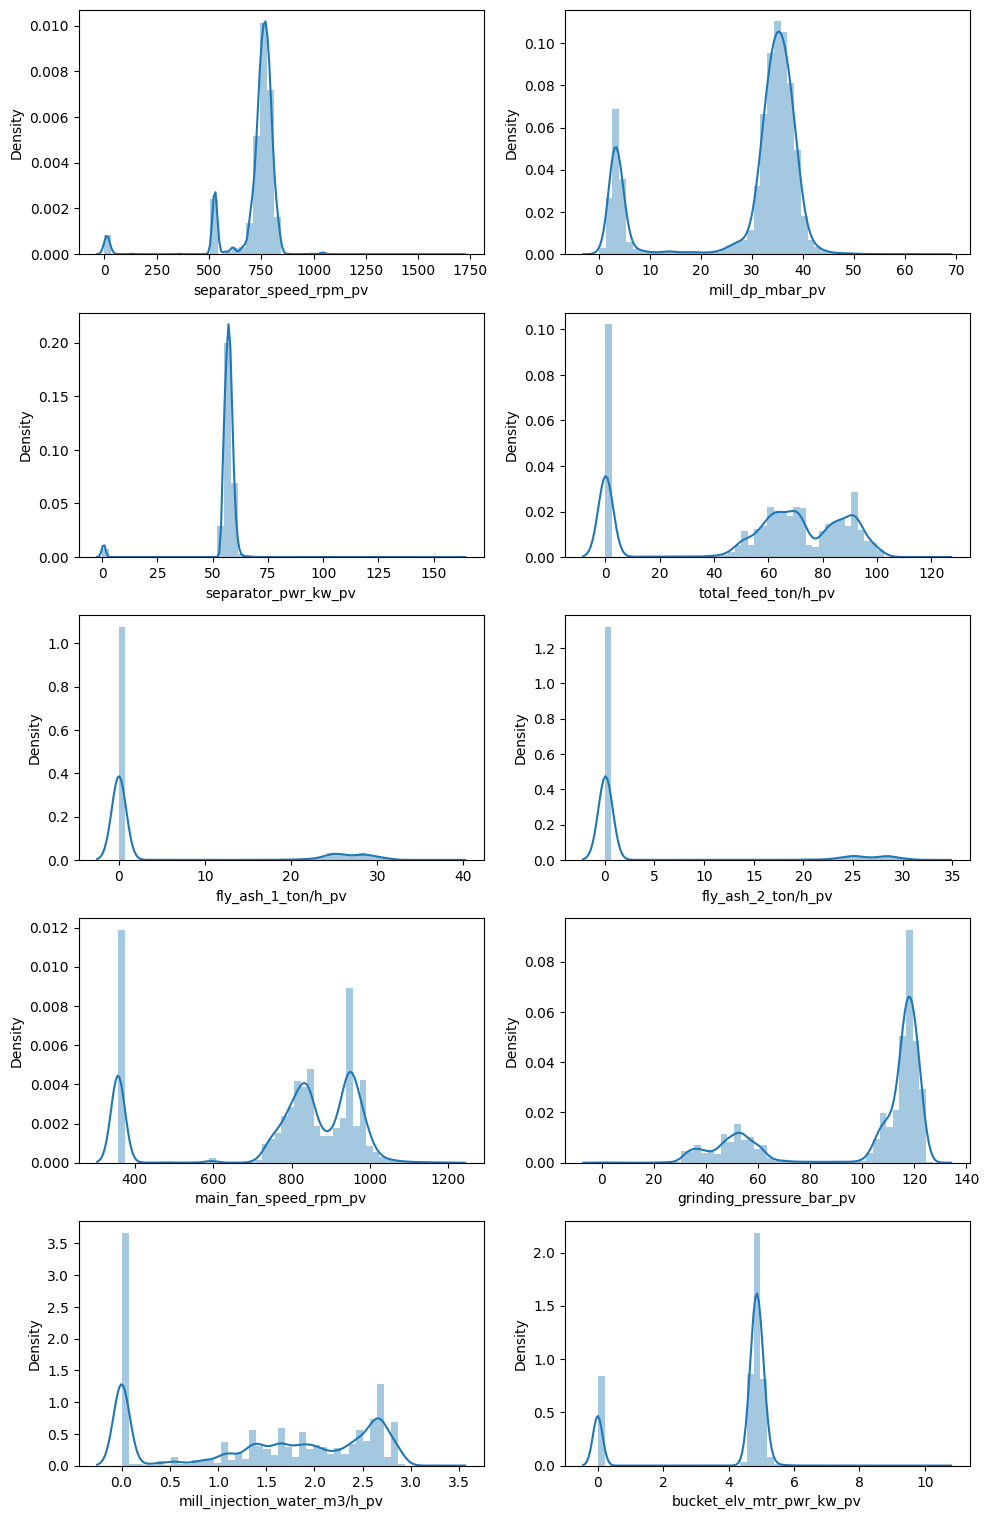

In [ ]:
#Visual
plt.figure(figsize=(10, 30))

ax = plt.subplot(10, 2, 1)
sns.distplot(df_Semester_noJulySeptember['separator_speed_rpm_pv'], ax=ax)

ax = plt.subplot(10, 2, 2)
sns.distplot(df_Semester_noJulySeptember['mill_dp_mbar_pv'], ax=ax)

ax = plt.subplot(10, 2, 3)
sns.distplot(df_Semester_noJulySeptember['separator_pwr_kw_pv'], ax=ax)

ax = plt.subplot(10, 2, 4)
sns.distplot(df_Semester_noJulySeptember['total_feed_ton/h_pv'], ax=ax)

ax = plt.subplot(10, 2, 5)
sns.distplot(df_Semester_noJulySeptember['fly_ash_1_ton/h_pv'], ax=ax)

ax = plt.subplot(10, 2, 6)
sns.distplot(df_Semester_noJulySeptember['fly_ash_2_ton/h_pv'], ax=ax)

ax = plt.subplot(10, 2, 7)
sns.distplot(df_Semester_noJulySeptember['main_fan_speed_rpm_pv'], ax=ax)

ax = plt.subplot(10, 2, 8)
sns.distplot(df_Semester_noJulySeptember['grinding_pressure_bar_pv'], ax=ax)

ax = plt.subplot(10, 2, 9)
sns.distplot(df_Semester_noJulySeptember['mill_injection_water_m3/h_pv'], ax=ax)

ax = plt.subplot(10, 2, 10)
sns.distplot(df_Semester_noJulySeptember['bucket_elv_mtr_pwr_kw_pv'], ax=ax)

plt.tight_layout()

## Statistics like you understand smart ass

In [ ]:
#Statistical summary
selected_columns = ['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'separator_pwr_kw_pv', 'total_feed_ton/h_pv', 'fly_ash_1_ton/h_pv', 'fly_ash_2_ton/h_pv', 'main_fan_speed_rpm_pv', 'grinding_pressure_bar_pv', 'mill_injection_water_m3/h_pv', 'bucket_elv_mtr_pwr_kw_pv']
df_Semester_noJulySeptember[selected_columns].describe()


,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv,total_feed_ton/h_pv,fly_ash_1_ton/h_pv,fly_ash_2_ton/h_pv,main_fan_speed_rpm_pv,grinding_pressure_bar_pv,mill_injection_water_m3/h_pv,bucket_elv_mtr_pwr_kw_pv
count,302433.000000,302433.000000,302433.000000,302433.000000,302433.000000,302433.000000,302433.000000,302433.000000,302433.000000,302433.000000
mean,720.310444,28.872246,55.873773,55.587052,5.003170,3.647788,776.648609,99.152349,1.474593,4.030866
std,144.173807,12.805773,9.273690,34.098201,10.427627,9.053412,221.304370,29.780647,1.049758,1.851817
min,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,357.000000,0.000000,0.000000,0.000000
25%,731.510000,30.600000,55.950000,37.800000,0.010000,0.060000,761.600000,69.000000,0.000000,4.690000
50%,759.180000,34.280000,57.150000,65.730000,0.020000,0.080000,842.520000,116.000000,1.650000,4.830000
75%,784.740000,36.580000,58.240000,82.910000,0.040000,0.100000,940.100000,119.000000,2.470000,4.940000
max,1690.000000,65.930000,162.000000,119.100000,37.690000,32.700000,1190.000000,127.000000,3.310000,10.360000


# 3. Quantify the delay time (if any) between a variation in the input variables and the outcome effect in the output variable.

" Despair is only for those who see the end beyond all doubt . We do not " - GANDALF

1. we dont need smoothing cause we get the same every time
2. adding the vusual in case we brainstorm anythig
3. im adding all the defs and we are going to kill the useless ones after the meeting

### Function to filter dataframe
#### mind that df_operating applies to the whole dataframe based on the "normal" operation of the output 'separator_pwr_kw_pv'. If you decide to consider another input/output you need to re-apply the function but this time for the input/output of choice.

In [ ]:
def normal_op(df, column: str, threshold: int):
    """
    Filters the dataframe to keep measurements only during normal machine operation.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing machine operation data.
    - column: The feature you want to filter
    - threshold: Value of the filter you want to apply

    Returns:
    - pandas.DataFrame: The filtered dataframe with measurements during normal operation.
    """

    # Filter the dataframe based on normal operation
    filtered_df = df[df[column] > threshold]

    return filtered_df

In [ ]:
df_norm_block1 = normal_op(df_Semester_noJulySeptember, "separator_pwr_kw_pv", 20)

In [ ]:
df_norm_block1

## Block1 - df_norm_block1 delay analysis

In [ ]:
df_norm_block1.index = df_norm_block1['date']

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 [Text(-50000.0, 0, '2019-10-12 23:07'),
  Text(0.0, 0, '2019-05-10 11:07'),
  Text(50000.0, 0, '2019-05-31 04:57'),
  Text(100000.0, 0, '2019-06-23 15:09'),
  Text(150000.0, 0, '2019-08-09 17:49'),
  Text(200000.0, 0, '2019-08-27 10:22'),
  Text(250000.0, 0, '2019-10-14 21:00'),
  Text(300000.0, 0, ''),
  Text(350000.0, 0, '')])

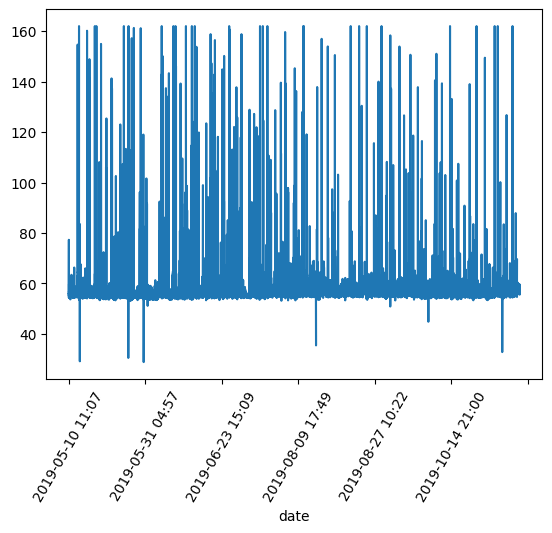

In [ ]:
df_norm_block1['separator_pwr_kw_pv'].plot()
plt.xticks(rotation=60)

Tsaganidou Delay

### df_norm_block1 - Block 1
We use this for block 1, in this code we search for delay between separator_pwr_kw_pv and separator_speed_rpm_pv

Set Index for df_May_June

In [ ]:
# Set index to subset the desired time period
df_Semester_noJulySeptember.set_index('date', inplace=True)

Reset Index (After the analysis)

In [ ]:
# Remember to reset the inxed after the delay analysis
df_Semester_noJulySeptember = df_Semester_noJulySeptember.reset_index()

### Perform delay analysis

Function for the visualization of delay

In [ ]:
def visual_delay(df, input:str, output:str, start_time:str, end_time:str, max_delay=20):
    """
    Creates a Delay-Correlation graph.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing machine operation data.
    - input: The feature you want to use as an input
    - output: The feature you want to use as an output
    - start_time
    - end_time
    """

    delays = np.arange(0, max_delay + 1)
    correlations = []

    for delay in delays:
        delayed_data_shifted = np.roll(df[output].values, delay)
        correlation = np.corrcoef(df[input].values, delayed_data_shifted)[0, 1]
        correlations.append(correlation)

    plt.plot(delays, correlations, marker='o')
    plt.xlabel('Delay')
    plt.ylabel('Correlation')
    plt.title('Delay Analysis')
    plt.grid(True)
    plt.xticks(delays)
    plt.show()

Function for the calculation of the delay with the maximum correlation

In [ ]:
def calc_delay(df, input:str, output:str, start_time:str, end_time:str, max_delay=20, time_resolution=0.5):
    """
    Returns the time delay with the highest correlation.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing machine operation data.
    - input: The feature you want to use as an input
    - output: The feature you want to use as an output
    - start_time
    - end_time
    - time_resolution: The interval of time (0.5 minutes by default)
    """

    delays = np.arange(0, max_delay + 1)
    correlations = []

    for delay in delays:
        delayed_data_shifted = np.roll(df[output].values, delay)
        correlation = np.corrcoef(df[input].values, delayed_data_shifted)[0, 1]
        correlations.append(correlation)

    max_correlation = max(correlations)
    max_delay = delays[correlations.index(max_correlation)]

    max_delay_seconds = max_delay * time_resolution

    return max_delay_seconds

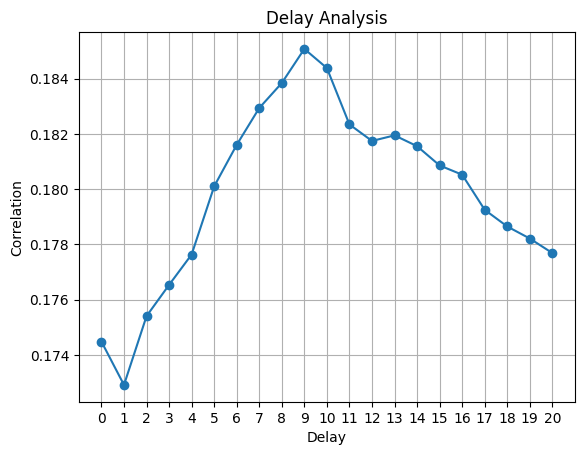

In [ ]:
visual_delay(df_norm_block1, 'separator_speed_rpm_pv', 'separator_pwr_kw_pv', '2019-05-11 11:00', '2019-10-30 20:30' )

In [ ]:
calc_delay(df_norm_block1, 'separator_speed_rpm_pv', 'separator_pwr_kw_pv', '2019-05-11 11:00', '2019-10-30 20:30' )

4.5

In [ ]:
calc_delay(df_norm_block1, 'mill_dp_mbar_pv', 'separator_pwr_kw_pv', '2019-05-11 11:00', '2019-10-30 20:30' )

2.0

## Block2 - df_norm_block1 delay analysis

These are the columns that work as input for Block 2
```
columns_for_delay_analysis = [['bucket_elv_mtr_pwr_kw_pv'],
                              ['mill_injection_water_m3/h_pv']
                              ['fly_ash_1_ton/h_pv'] ,
                              ['fly_ash_2_ton/h_pv'] ,
                              ['grinding_pressure_bar_pv'],
                              ['mill_out_pres_mbar_pv'] ]
```
We checked every column by trying to print it.

Only May and June have all the columns, so we keep them for training

The results are here: https://docs.google.com/spreadsheets/d/1P-yOw3OwG3VYdGmTPtB4KKFuZp_O2IkUChyMP82qp5U/edit?usp=sharing

Now we will create a new dataframe for May and June to perfom delay analysis for mill_injection_water_m3/h_pv,	fly_ash_1_ton/h_pv,	fly_ash_2_ton/h_pv

For bucket_elv_mtr_pwr_kw_pv,	grinding_pressure_bar_pv we can use separetly the months August and October too (according to the spreadsheet we created)

In [ ]:
find_name(df_Semester_noJulySeptember, 'injection')

In [ ]:
inputs = ['total_feed_ton/h_pv',
          'fly_ash_2_ton/h_pv',
          'fly_ash_2_ton/h_pv',
          'main_fan_speed_rpm_pv',
          'separator_speed_rpm_pv',
          'grinding_pressure_bar_pv',
          'mill_injection_water_m3/h_pv',
          'bucket_elv_mtr_pwr_kw_pv']

In [ ]:
for feature in inputs:
  print(f"The time delay for {feature} is {calc_delay(df_norm_block1, feature, 'mill_dp_mbar_pv', '2019-05-11 11:00', '2019-10-30 20:30' )}")

The time delay for total_feed_ton/h_pv is 0.0
The time delay for fly_ash_2_ton/h_pv is 0.0
The time delay for fly_ash_2_ton/h_pv is 0.0
The time delay for main_fan_speed_rpm_pv is 0.0
The time delay for separator_speed_rpm_pv is 4.0
The time delay for grinding_pressure_bar_pv is 0.0
The time delay for mill_injection_water_m3/h_pv is 0.0
The time delay for bucket_elv_mtr_pwr_kw_pv is 0.0


# 4. Explore the correlation of the output variable with the input variables using visual and statistical methods and describe the influence on the output variable that a variation of the input values causes

In [ ]:
df_norm_block1['date']

date
2019-05-10 11:07    2019-05-10 11:07
2019-05-10 11:12    2019-05-10 11:12
2019-05-10 11:24    2019-05-10 11:24
2019-05-10 11:24    2019-05-10 11:24
2019-05-10 11:25    2019-05-10 11:25
                          ...       
2019-10-31 23:57    2019-10-31 23:57
2019-10-31 23:57    2019-10-31 23:57
2019-10-31 23:58    2019-10-31 23:58
2019-10-31 23:58    2019-10-31 23:58
2019-10-31 23:59    2019-10-31 23:59
Name: date, Length: 294717, dtype: object

In [ ]:
# Convert the first column to datetime type
df_norm_block1['date'] = pd.to_datetime(df_norm_block1['date'])

# Set the first column as the index (required for time-based slicing)
df_norm_block1.set_index('date', inplace=True)

def plot_slice(df_norm_block1, start_time, end_time, variable):

  # Slice the dataframe based on the time range
  df_period = df_norm_block1[start_time:end_time]

  # Plot the desired columns within the specified period
  df_period[[variable]].plot()

  # Set plot title and labels
  plt.title('Data for Specific Period')
  plt.xlabel('Time')
  plt.ylabel('Values')

  # Display the plot
  plt.show()

In [ ]:
#check the output is working on this period
plot_slice(df_norm_block1, '2019-08-01 09:00:00', '2019-08-30 15:00:00', 'separator_pwr_kw_pv')

In [ ]:
###Σε αυτό το μπλοκ ειναι που παιρνω διαφορα timeframes και μου βγαζει σε ενα γραφημα την λειτουργια ολων των μεταβλητων

# Specify the start and end times for the slice
#start_time = '2019-06-05 01:30:00'
#end_time = '2019-06-05 09:30:00'

# Select the columns of interest
#columns_of_interest = ['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'separator_pwr_kw_pv']

# Create a subset dataframe based on the specified timeframe
#subset_df = df_Semester_noJuly.loc[start_time:end_time, columns_of_interest]

# Plot the columns over time
#plt.figure(figsize=(12, 6))
#for column in columns_of_interest:
 #   plt.plot(subset_df.index, subset_df[column], label=column)

# Add labels and legend
#plt.xlabel('Timestamp')
#plt.ylabel('Value')
#plt.title('Separator Speed, Mill DP, and Separator Power Over Time')
#plt.legend()

# Show the plot
#plt.show()

In [ ]:
#start_time = '2019-06-05 01:30:00'
#end_time = '2019-06-05 09:30:00'

# Create scatter plot separator speed VS separator power
#plt.scatter(df_Semester_noJuly.loc[start_time:end_time, 'mill_dp_mbar_pv'], df_Semester_noJuly.loc[start_time:end_time, 'separator_pwr_kw_pv'])

# Add labels and title
#plt.xlabel('Separator Speed')
#plt.ylabel('Separator Motor Power')
#plt.title('Scatter Plot: Separator Speed vs Separator Motor Power')

# Show the plot
#plt.show()

#Clusters on a Horizontal Line:
#The presence of clusters on a horizontal line suggests that there are specific combinations of separator speed and separator motor power that
#occur frequently in the data.
#This indicates that certain operating conditions or settings may result in consistent values of separator motor power,
#regardless of changes in the separator speed. It could be an indication of a threshold or a particular regime of operation where the system
#behaves in a stable manner.

#Higher Value Outliers: The presence of higher value outliers represents data points that deviate significantly from the general pattern of the scatter plot. These outliers could indicate unusual or extreme operating conditions that lead to higher values of separator motor power. They may be caused by transient events, equipment malfunctions, or other factors that result in abnormal behavior. It would be worth investigating these outliers to understand their causes and whether any actions or adjustments are needed to address them.


In [ ]:
#start_time = '2019-06-05 01:30:00'
#end_time = '2019-06-05 09:30:00'

# Create scatter plot mill dp VS separator power
#plt.scatter(df_Semester_noJuly.loc[start_time:end_time, 'separator_speed_rpm_pv'], df_Semester_noJuly.loc[start_time:end_time, 'separator_pwr_kw_pv'])

# Add labels and title
#plt.xlabel('Mill DP')
#plt.ylabel('Separator Motor Power')
#plt.title('Scatter Plot: Mill DP vs Separator Motor Power')

# Show the plot
#plt.show()

Text(0.5, 1.0, 'block 1')

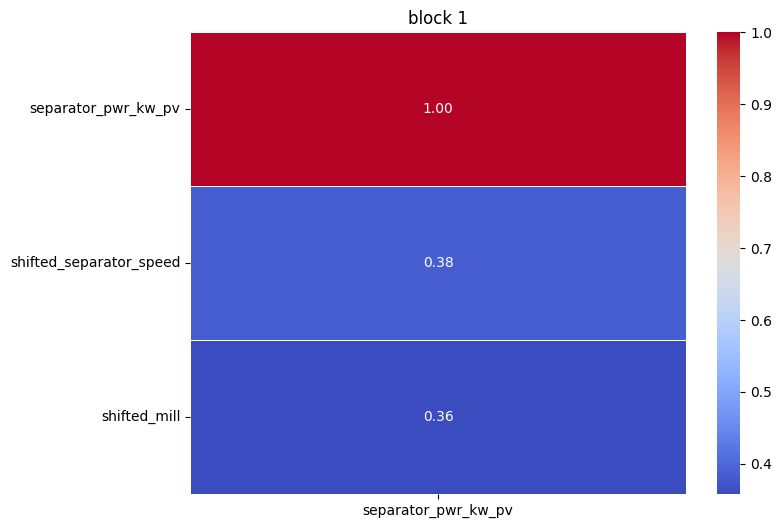

In [ ]:
# Heatmap

start_time = '2019-08-01 09:00:00'
end_time = '2019-08-30 15:00:00'

df_norm_block1['shifted_separator_speed']= df_norm_block1['separator_speed_rpm_pv'].shift(-9)
df_norm_block1['shifted_mill'] = df_norm_block1['mill_dp_mbar_pv'].shift(-4)
#df_norm_block1['shifted_separator_pwr'] = df_norm_block1['separator_pwr_kw_pv'].shift(6)


# Select the columns of interest
columns_of_interest = ['separator_pwr_kw_pv', 'shifted_separator_speed', 'shifted_mill']
subset_df = df_norm_block1.loc[start_time:end_time, columns_of_interest]


# Compute the correlation matrix
correlation_matrix = subset_df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
sns.heatmap(correlation_matrix[['separator_pwr_kw_pv']].sort_values(by = 'separator_pwr_kw_pv', ascending = False), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('block 1')

# Save the heatmap at googledrive
#file_path = '/content/drive/MyDrive/heatmap.png'
#plt.savefig(file_path, bbox_inches='tight', pad_inches=0.1)

In [ ]:
#statistical measures for correlation

# Specify the start and end times for the slice
#start_time = '2019-06-05 01:30:00'
#end_time = '2019-06-05 09:30:00'

# Select the columns of interest
#columns_of_interest = ['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'separator_pwr_kw_pv']

# Create a subset dataframe based on the specified timeframe
#subset_df = df_Semester_noJulySeptember.loc[start_time:end_time, columns_of_interest]

# Calculate the correlation matrix
#correlation_matrix = subset_df.corr()

#subset_df['shifted_speed'] = subset_df['separator_speed_rpm_pv'].shift(10)
#subset_df['shifted_mill'] = subset_df['mill_dp_mbar_pv'].shift(10)


# Compute the correlation matrix
#correlation_matrix = subset_df.corr()
#correlation_matrix = subset_df[['separator_pwr_kw_pv', 'shifted_speed', 'shifted_mill']].corr()

# Display the correlation matrix
print(correlation_matrix)

                         separator_pwr_kw_pv  shifted_separator_speed  \
separator_pwr_kw_pv                 1.000000                 0.384549   
shifted_separator_speed             0.384549                 1.000000   
shifted_mill                        0.357729                 0.572040   

                         shifted_mill  
separator_pwr_kw_pv          0.357729  
shifted_separator_speed      0.572040  
shifted_mill                 1.000000  


**block 2**

Text(0.5, 1.0, 'block2')

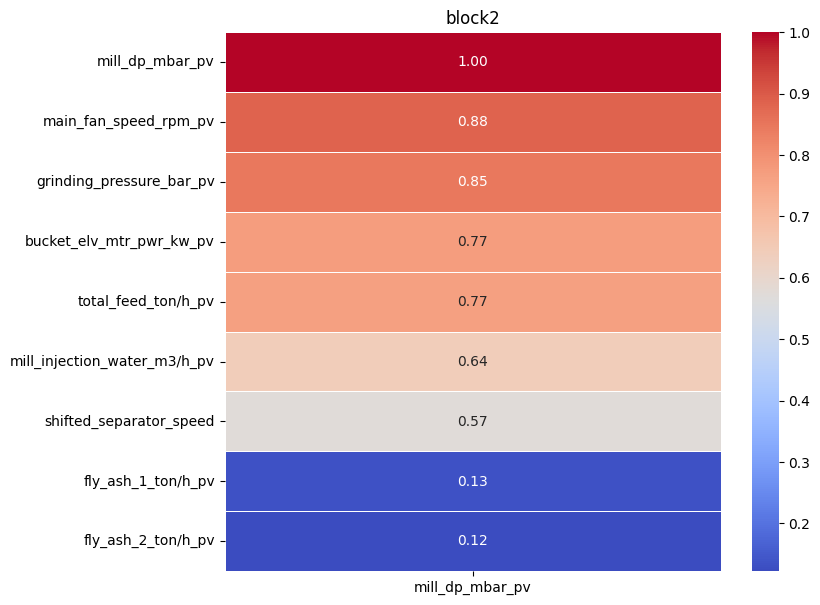

In [ ]:
# Heatmap

start_time = '2019-08-01 09:00:00'
end_time = '2019-08-30 15:00:00'

#df_norm_block1['shifted_total_feed']= df_norm_block1['total_feed_ton/h_pv'].shift(6)
#df_norm_block1['shifted_fly_ash_1'] = df_norm_block1['fly_ash_1_ton/h_pv'].shift(6)
#df_norm_block1['shifted_fly_ash_2']= df_norm_block1['fly_ash_2_ton/h_pv'].shift(6)
#df_norm_block1['shifted_main_fan_speed'] = df_norm_block1['main_fan_speed_rpm_pv'].shift(6)
df_norm_block1['shifted_separator_speed'] = df_norm_block1['separator_speed_rpm_pv'].shift(-8)
#df_norm_block1['shifted_grinding_pressure_bar'] = df_norm_block1['grinding_pressure_bar_pv'].shift(6)
#df_norm_block1['shifted_mill_injection_water'] = df_norm_block1['mill_injection_water_m3/h_pv'].shift(6)
#df_norm_block1['shifted_bucket_elv_mtr'] = df_norm_block1['bucket_elv_mtr_pwr_kw_pv'].shift(6)
#df_norm_block1['shifted_mill_dp_mbar_pv'] = df_norm_block1['mill_dp_mbar_pv'].shift(6)


# Select the columns of interest
columns_of_interest2 = ['mill_dp_mbar_pv', 'total_feed_ton/h_pv', 'fly_ash_1_ton/h_pv', 'fly_ash_2_ton/h_pv', 'main_fan_speed_rpm_pv', 'shifted_separator_speed', 'grinding_pressure_bar_pv', 'mill_injection_water_m3/h_pv', 'bucket_elv_mtr_pwr_kw_pv' ]
subset_df2 = df_norm_block1.loc[start_time:end_time, columns_of_interest2]

# Compute the correlation matrix
correlation_matrix2 = subset_df2.corr()

# Create the heatmap
plt.figure(figsize=(8, 7))
#sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
sns.heatmap(correlation_matrix2[['mill_dp_mbar_pv']].sort_values(by = 'mill_dp_mbar_pv', ascending = False), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('block2')

# Save the heatmap at googledrive
#file_path2 = '/content/drive/MyDrive/heatmap2.png'
#plt.savefig(file_path2, bbox_inches='tight', pad_inches=0.1)

In [ ]:
#statistical measures for correlation

# Specify the start and end times for the slice
#start_time = '2019-06-05 01:30:00'
#end_time = '2019-06-05 09:30:00'

# Select the columns of interest
#columns_of_interest2 = ['mill_dp_mbar_pv', 'total_feed_ton/h_pv', 'fly_ash_1_ton/h_pv', 'fly_ash_2_ton/h_pv', 'main_fan_speed_rpm_pv', 'separator_speed_rpm_pv', 'grinding_pressure_bar_pv','mill_injection_water_m3/h_pv', 'bucket_elv_mtr_pwr_kw_pv']

# Create a subset dataframe based on the specified timeframe
#subset_df2 = df_Semester_noJulySeptember.loc[start_time:end_time, columns_of_interest2]

# Calculate the correlation matrix
#correlation_matrix2 = subset_df2.corr()

# Display the correlation matrix
print(correlation_matrix2)

                              mill_dp_mbar_pv  total_feed_ton/h_pv  \
mill_dp_mbar_pv                      1.000000             0.766507   
total_feed_ton/h_pv                  0.766507             1.000000   
fly_ash_1_ton/h_pv                   0.134555             0.400319   
fly_ash_2_ton/h_pv                   0.122303             0.324747   
main_fan_speed_rpm_pv                0.884932             0.644122   
shifted_separator_speed              0.572746             0.429668   
grinding_pressure_bar_pv             0.848387             0.893920   
mill_injection_water_m3/h_pv         0.642286             0.870137   
bucket_elv_mtr_pwr_kw_pv             0.772607             0.768222   

                              fly_ash_1_ton/h_pv  fly_ash_2_ton/h_pv  \
mill_dp_mbar_pv                         0.134555            0.122303   
total_feed_ton/h_pv                     0.400319            0.324747   
fly_ash_1_ton/h_pv                      1.000000           -0.279294   
fly_ash_2_t

# 5 Main. Using the proposed input variables (and any other variable from the received dataset that you think is relevant) create a model that, given the operating conditions of the mill, can predict the output variable for the next 5 minutes, in 30 second intervals.

### We end up with two different dataframes each for the two types of cement

In [ ]:
df_cpii = df_norm_block1[df_norm_block1['cement_type_cpii_bool_pv'] == 1]
df_cpiv = df_norm_block1[df_norm_block1['cement_type_cpiv_bool_pv'] == 1]

### Machine Learning

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [ ]:
def split_data(df, input_variables, output_variable):
    X = df[input_variables]
    y = df[output_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

def run_xgboost_regression(X_train, X_test, y_train, y_test):
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    return mae, mse, mape

def run_random_forest_regression(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    return mae, mse, mape

def run_linear_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    return mae, mse, mape

def run_ridge_regression(X_train, X_test, y_train, y_test):
    model = Ridge()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    return mae, mse, mape

def run_lasso_regression(X_train, X_test, y_train, y_test):
    model = Lasso()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    return mae, mse, mape

def run_elasticnet_regression(X_train, X_test, y_train, y_test):
    model = ElasticNet()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    return mae, mse, mape

def run_svr(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = SVR()
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    return mae, mse, mape

### Block 1

#### cpii

In [ ]:
block_1_inputs = df_cpii[['shifted_separator_speed', 'shifted_mill']].fillna(df_cpii[['shifted_separator_speed', 'shifted_mill']].mean())
block_1_output = df_cpii['separator_pwr_kw_pv']

In [ ]:
X = block_1_inputs
y = block_1_output

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Extracting the last 10 rows for y_test
X_test = X.iloc[-10:]
y_test = y.iloc[-10:]

# Extracting the rest of the data for x_train
X_train = X.iloc[:-10]
y_train = y.iloc[:-10]

# Splitting x_train into x_train and x_val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [ ]:
regressors = {
    'Dummy': DummyRegressor(),
    'BayesianRidge': BayesianRidge(),
    'XGB': XGBRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso()
}


for name, model in regressors.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name : >20} - MSE: {mean_squared_error(y_test, y_pred):.3f},\
     MAPE: {(mean_absolute_percentage_error(y_test, y_pred))*100:.3f}%')

               Dummy - MSE: 0.435,     MAPE: 0.909%
       BayesianRidge - MSE: 0.364,     MAPE: 0.748%
                 XGB - MSE: 0.671,     MAPE: 1.175%
RandomForestRegressor - MSE: 2.397,     MAPE: 1.901%
    LinearRegression - MSE: 0.364,     MAPE: 0.748%
               Ridge - MSE: 0.364,     MAPE: 0.748%
 KNeighborsRegressor - MSE: 0.532,     MAPE: 1.004%
          ElasticNet - MSE: 0.406,     MAPE: 0.784%
               Lasso - MSE: 0.444,     MAPE: 0.813%


In [ ]:
hyperparams = {
    'n_iter': [200, 300, 400],
}

alg = BayesianRidge()

gs = GridSearchCV(alg, hyperparams)

gs.fit(X_train, y_train)

GridSearchCV(estimator=BayesianRidge(), param_grid={'n_iter': [200, 300, 400]})

In [ ]:
gs.best_params_

{'n_iter': 200}

##### Validation for BayesianRidge

In [ ]:
model = BayesianRidge(n_iter= 200)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_pred):.3f},\
  MAPE: {(mean_absolute_percentage_error(y_val, y_pred))*100:.3f}%')

MSE: 4.664,  MAPE: 1.868%


In [ ]:
hyperparams = {
    'n_estimators': [100, 200, 300],

}

alg = XGBRegressor()

gs = GridSearchCV(alg, hyperparams)

gs.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'n_estimators': [100, 200, 300]})

In [ ]:
gs.best_params_

{'n_estimators': 100}

##### Validation for XGBRegressor

In [ ]:
model = XGBRegressor(n_estimators = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_pred):.3f},\
  MAPE: {(mean_absolute_percentage_error(y_val, y_pred))*100:.3f}%')

MSE: 4.655,  MAPE: 1.776%


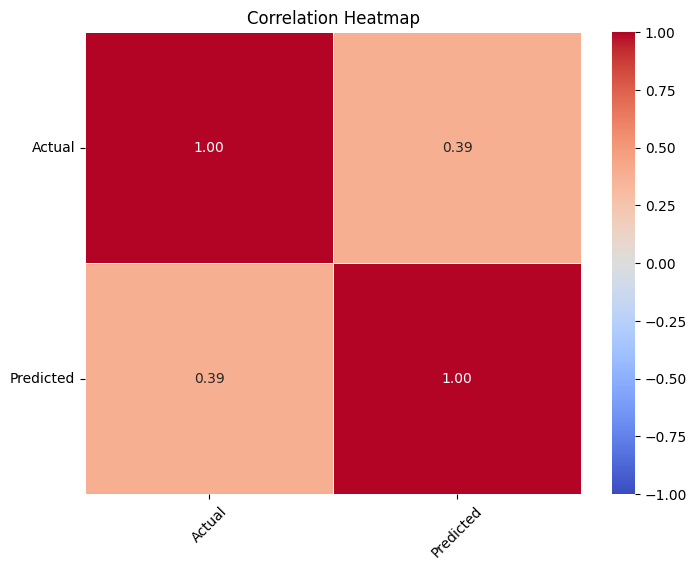

Correlation Coefficient: 0.3865


In [ ]:
plot_correlation(y_val, y_pred)

#### cpiv

In [ ]:
block_1_inputs = df_cpiv[['shifted_separator_speed', 'shifted_mill']].fillna(df_cpiv[['shifted_separator_speed', 'shifted_mill']].mean())
block_1_output = df_cpiv['separator_pwr_kw_pv']

In [ ]:
X = block_1_inputs
y = block_1_output

In [ ]:
 #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

 # Extracting the last 10 rows for y_test
X_test = X.iloc[-10:]
y_test = y.iloc[-10:]

# Extracting the rest of the data for x_train
X_train = X.iloc[:-10]
y_train = y.iloc[:-10]

# Splitting x_train into x_train and x_val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [ ]:
regressors = {
    'Dummy': DummyRegressor(),
    'BayesianRidge': BayesianRidge(),
    'XGB': XGBRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso()
}


for name, model in regressors.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name : >20} - MSE: {mean_squared_error(y_test, y_pred):.3f},\
     MAPE: {(mean_absolute_percentage_error(y_test, y_pred))*100:.3f}%')

               Dummy - MSE: 0.769,     MAPE: 1.275%
       BayesianRidge - MSE: 1.644,     MAPE: 2.009%
                 XGB - MSE: 4.541,     MAPE: 2.352%
RandomForestRegressor - MSE: 0.908,     MAPE: 1.348%
    LinearRegression - MSE: 1.644,     MAPE: 2.009%
               Ridge - MSE: 1.644,     MAPE: 2.009%
 KNeighborsRegressor - MSE: 0.444,     MAPE: 0.953%
          ElasticNet - MSE: 1.473,     MAPE: 1.867%
               Lasso - MSE: 1.335,     MAPE: 1.743%


In [ ]:
hyperparams = {
    'n_iter': [200, 300, 400],
}

alg = BayesianRidge()

gs = GridSearchCV(alg, hyperparams)

gs.fit(X_train, y_train)

GridSearchCV(estimator=BayesianRidge(), param_grid={'n_iter': [200, 300, 400]})

In [ ]:
gs.best_params_

{'n_iter': 200}

##### Validation for BayesianRidge

In [ ]:
model = BayesianRidge(n_iter= 200)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_pred):.3f},\
  MAPE: {(mean_absolute_percentage_error(y_val, y_pred)):.3f}')

MSE: 3.800,  MAPE: 0.014


In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_pred):.3f},\
  MAPE: {(mean_absolute_percentage_error(y_val, y_pred)):.3f}')

MSE: 4.520,  MAPE: 0.015


Plot for BayesianRidge

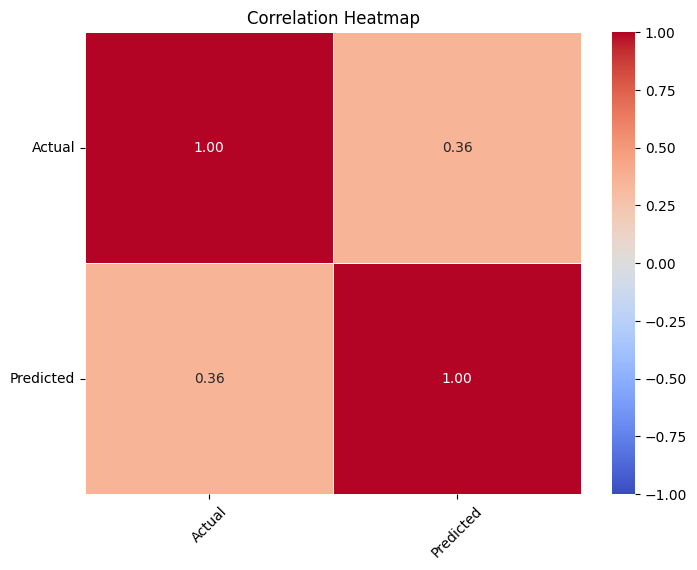

Correlation Coefficient: 0.3581


In [ ]:
plot_correlation(y_val, y_pred)

In [ ]:
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_pred):.3f},\
  MAPE: {(mean_absolute_percentage_error(y_val, y_pred))*100:.3f}%')

MSE: 4.672,  MAPE: 1.872%


In [ ]:
hyperparams = {
    'n_iter': [200, 300, 400],
}

alg = BayesianRidge()

gs = GridSearchCV(alg, hyperparams)

gs.fit(X_train, y_train)

### Block 2

#### cpii

In [ ]:
block_2_inputs = df_cpii[['total_feed_ton/h_pv', 'fly_ash_1_ton/h_pv', 'fly_ash_2_ton/h_pv', 'main_fan_speed_rpm_pv', 'shifted_separator_speed', 'grinding_pressure_bar_pv', 'mill_injection_water_m3/h_pv', 'bucket_elv_mtr_pwr_kw_pv']].fillna(df_cpii[['total_feed_ton/h_pv', 'fly_ash_1_ton/h_pv', 'fly_ash_2_ton/h_pv', 'main_fan_speed_rpm_pv', 'shifted_separator_speed', 'grinding_pressure_bar_pv', 'mill_injection_water_m3/h_pv', 'bucket_elv_mtr_pwr_kw_pv']].mean())
block_2_output = df_cpii['mill_dp_mbar_pv']

In [ ]:
X = block_2_inputs
y = block_2_output

In [ ]:
 #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 # Extracting the last 10 rows for y_test
X_test = X.iloc[-10:]
y_test = y.iloc[-10:]

# Extracting the rest of the data for x_train
X_train = X.iloc[:-10]
y_train = y.iloc[:-10]

# Splitting x_train into x_train and x_val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [ ]:
regressors = {
    'Dummy': DummyRegressor(),
    'BayesianRidge': BayesianRidge(),
    'XGB': XGBRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso()
}


for name, model in regressors.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name : >20} - MSE: {mean_squared_error(y_test, y_pred):.3f},\
     MAPE: {(mean_absolute_percentage_error(y_test, y_pred))*100:.3f}%')

               Dummy - MSE: 51.781,     MAPE: 20.358%
       BayesianRidge - MSE: 84.550,     MAPE: 24.434%
                 XGB - MSE: 11.909,     MAPE: 8.483%
RandomForestRegressor - MSE: 12.216,     MAPE: 9.251%
    LinearRegression - MSE: 84.559,     MAPE: 24.437%
               Ridge - MSE: 84.559,     MAPE: 24.437%
 KNeighborsRegressor - MSE: 60.205,     MAPE: 18.156%
          ElasticNet - MSE: 92.316,     MAPE: 24.643%
               Lasso - MSE: 91.860,     MAPE: 24.555%


In [ ]:
hyperparams = {
    'n_estimators': [50, 100, 150],
}

alg = RandomForestRegressor()

gs = GridSearchCV(alg, hyperparams)

gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50, 100, 150]})

In [ ]:
gs.best_params_

{'n_estimators': 50}

##### Validation for RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators= 50)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_pred):.3f},\
  MAPE: {(mean_absolute_percentage_error(y_val, y_pred))*100:.3f}%')

MSE: 13.003,  MAPE: 10.548%


Plot for RandomForest

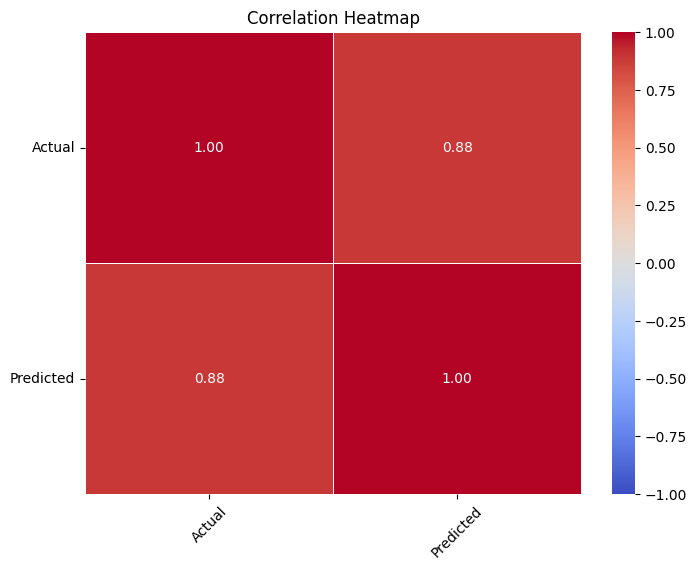

Correlation Coefficient: 0.8845


In [ ]:
plot_correlation(y_val, y_pred)

##### Validation for XGBRegressor

In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_pred):.3f},\
  MAPE: {(mean_absolute_percentage_error(y_val, y_pred))*100:.3f}%')

MSE: 18.979,  MAPE: 11.850%


#### cpiv

In [ ]:
block_2_inputs = df_cpiv[['total_feed_ton/h_pv', 'fly_ash_1_ton/h_pv', 'fly_ash_2_ton/h_pv', 'main_fan_speed_rpm_pv', 'shifted_separator_speed', 'grinding_pressure_bar_pv', 'mill_injection_water_m3/h_pv', 'bucket_elv_mtr_pwr_kw_pv']].fillna(df_cpiv[['total_feed_ton/h_pv', 'fly_ash_1_ton/h_pv', 'fly_ash_2_ton/h_pv', 'main_fan_speed_rpm_pv', 'shifted_separator_speed', 'grinding_pressure_bar_pv', 'mill_injection_water_m3/h_pv', 'bucket_elv_mtr_pwr_kw_pv']].mean())
block_2_output = df_cpiv['mill_dp_mbar_pv']

In [ ]:
X = block_2_inputs
y = block_2_output

In [ ]:
 #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

 # Extracting the last 10 rows for y_test
X_test = X.iloc[-10:]
y_test = y.iloc[-10:]

# Extracting the rest of the data for x_train
X_train = X.iloc[:-10]
y_train = y.iloc[:-10]

# Splitting x_train into x_train and x_val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [ ]:
regressors = {
    'Dummy': DummyRegressor(),
    'BayesianRidge': BayesianRidge(),
    'XGB': XGBRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso()
}


for name, model in regressors.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name : >20} - MSE: {mean_squared_error(y_test, y_pred):.3f},\
     MAPE: {(mean_absolute_percentage_error(y_test, y_pred))*100:.3f}%')

               Dummy - MSE: 56.105,     MAPE: 20.386%
       BayesianRidge - MSE: 47.526,     MAPE: 15.141%
                 XGB - MSE: 2.378,     MAPE: 3.771%
RandomForestRegressor - MSE: 3.915,     MAPE: 5.021%
    LinearRegression - MSE: 47.503,     MAPE: 15.137%
               Ridge - MSE: 47.503,     MAPE: 15.137%
 KNeighborsRegressor - MSE: 2.312,     MAPE: 3.638%
          ElasticNet - MSE: 63.842,     MAPE: 18.460%
               Lasso - MSE: 65.695,     MAPE: 19.319%


In [ ]:
hyperparams = {
    'n_estimators': [100, 200, 300],

}

alg = XGBRegressor()

gs = GridSearchCV(alg, hyperparams)

gs.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'n_estimators': [100, 200, 300]})

In [ ]:
gs.best_params_

{'n_estimators': 100}

##### Validation for XGBRegressor

In [ ]:
model = XGBRegressor(n_estimators= 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_pred):.3f},\
  MAPE: {(mean_absolute_percentage_error(y_val, y_pred))*100:.3f}%')

MSE: 6.497,  MAPE: 10.096%


Plot for XGBRegressor

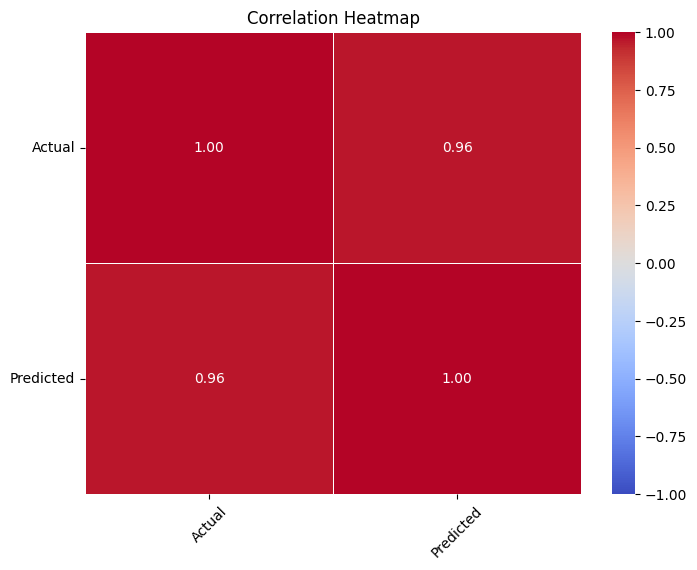

Correlation Coefficient: 0.9622


In [ ]:
plot_correlation(y_val, y_pred)

##### Validation for XGBRegressor

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_pred):.3f},\
  MAPE: {(mean_absolute_percentage_error(y_val, y_pred))*100:.3f}%')

MSE: 8.293,  MAPE: 10.399%


# This was the end ..... at least we still dont know how to code .... but we know each other and we had fun .....
